In [2]:

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(train_data[0])
print(train_labels[0])


17473536/17464789 [==============================] - 2s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178,

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([value, key] for (key, value) in word_index.items())
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

1654784/1641221 [==============================] - 1s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

In [4]:
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    # 创建一个形状为len(sequences), 10000的矩阵
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


# 将测试和训练数据都进行one hot编码
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(x_train.shape)

(25000, 10000)


In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))




2023-04-27 07:40:52.413856: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-27 07:40:52.413981: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-27 07:40:52.414024: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-04-27 07:40:52.414053: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-04-27 07:40:52.414081: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [6]:

x_val = x_train[:10000]
print(x_val.shape)
partial_x_train = x_train[10000:]
print(partial_x_train.shape)
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
# 概率问题模型交叉熵crossentropy是损失函数最好的选择
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

(10000, 10000)
(15000, 10000)
Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5303 - accuracy: 0.7969 - val_loss: 0.4057 - val_accuracy: 0.8449
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3101 - accuracy: 0.8985 - val_loss: 0.3192 - val_accuracy: 0.8746
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2274 - accuracy: 0.9267 - val_loss: 0.2825 - val_accuracy: 0.8895
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1802 - accuracy: 0.9418 - val_loss: 0.2878 - val_accuracy: 0.8848
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1474 - accuracy: 0.9521 - val_loss: 0.2809 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1229 - accuracy: 0.9608 - val_loss: 0.3490 - val_accuracy: 0.8710
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1019 - accuracy: 0.9701 - val_loss: 0.3172 - val_accu

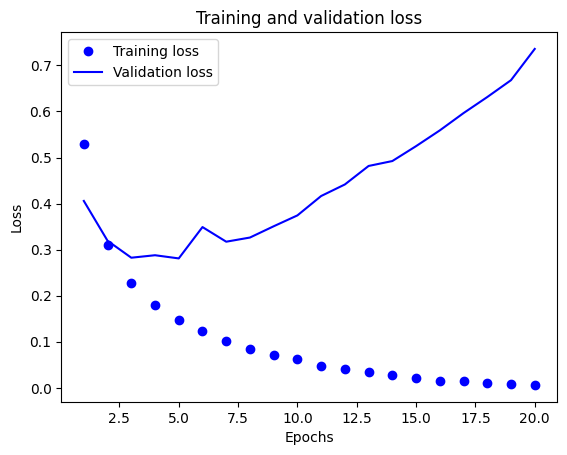

In [7]:
import matplotlib.pyplot as plt


def print_train_val_loss(history_dict):
    plt.clf()
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


print_train_val_loss(history.history)

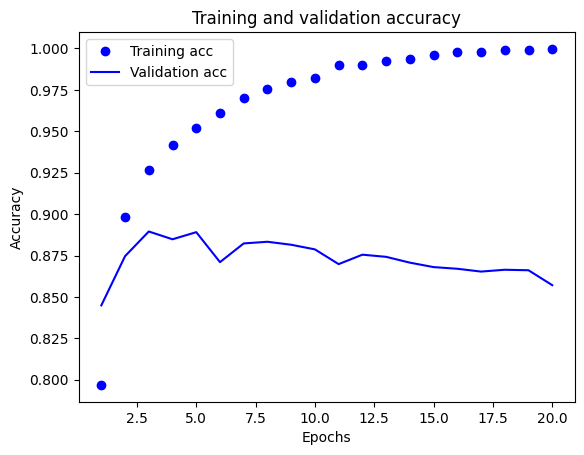

In [8]:
def print_train_val_acc(history_dict):
    plt.clf()
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    epochs = range(1, len(val_acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


print_train_val_acc(history.history)

In [9]:
# 从头训练一个新的模型
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 1s 6ms/step - loss: 0.4653 - accuracy: 0.8182
Epoch 2/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2659 - accuracy: 0.9076
Epoch 3/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2028 - accuracy: 0.9291
Epoch 4/4
782/782 [==============================] - 1s 876us/step - loss: 0.2977 - accuracy: 0.8810


In [10]:
print(results)
model.predict(x_test)

[0.297724187374115, 0.8809999823570251]


array([[0.2542116 ],
       [0.9999592 ],
       [0.8954455 ],
       ...,
       [0.13408592],
       [0.11838493],
       [0.691411  ]], dtype=float32)

Epoch 1/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5303 - accuracy: 0.7737 - val_loss: 0.3923 - val_accuracy: 0.8611
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.3046 - accuracy: 0.9039 - val_loss: 0.3023 - val_accuracy: 0.8896
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2208 - accuracy: 0.9279 - val_loss: 0.3040 - val_accuracy: 0.8769
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1736 - accuracy: 0.9430 - val_loss: 0.2781 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1356 - accuracy: 0.9562 - val_loss: 0.2976 - val_accuracy: 0.8808
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1132 - accuracy: 0.9650 - val_loss: 0.3096 - val_accuracy: 0.8805
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0888 - accuracy: 0.9740 - val_loss: 0.3370 - val_accuracy: 0.8763
Epoch 8/20
30/30 [=

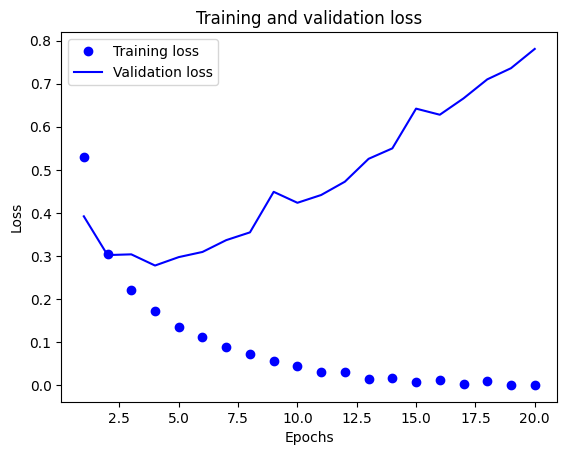

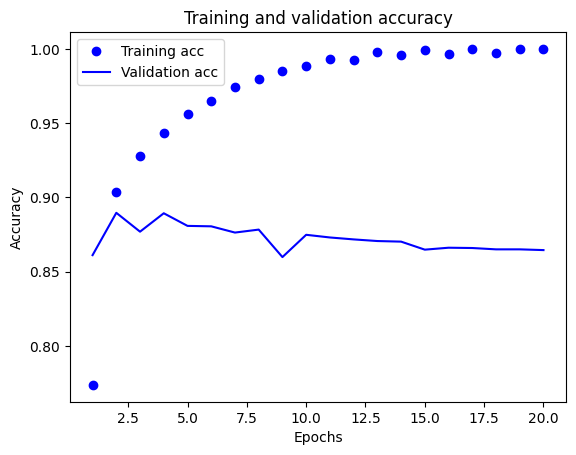

782/782 [==============================] - 1s 869us/step - loss: 0.8420 - accuracy: 0.8520


In [11]:
# 使用三个隐藏层的新模型, 发现在epochs=2的时候效果最好
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
print_train_val_loss(history.history)
print_train_val_acc(history.history)
results = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4869 - accuracy: 0.7887 - val_loss: 0.3460 - val_accuracy: 0.8699
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2690 - accuracy: 0.9055 - val_loss: 0.2916 - val_accuracy: 0.8845
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1992 - accuracy: 0.9283 - val_loss: 0.2993 - val_accuracy: 0.8804
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1529 - accuracy: 0.9471 - val_loss: 0.3083 - val_accuracy: 0.8822
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1221 - accuracy: 0.9598 - val_loss: 0.3223 - val_accuracy: 0.8804
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0960 - accuracy: 0.9700 - val_loss: 0.3226 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0815 - accuracy: 0.9729 - val_loss: 0.3533 - val_accuracy: 0.8766
Epoch 8/20
30

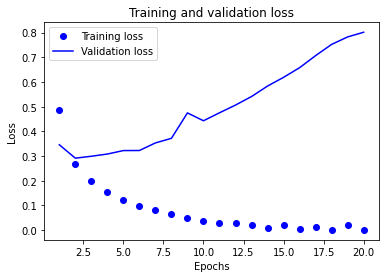

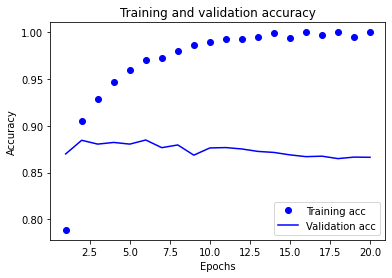

782/782 [==============================] - 1s 896us/step - loss: 0.8751 - accuracy: 0.8509
[0.8750860095024109, 0.8509200215339661]


In [27]:
# 使用32个隐藏单元,过拟合发生很快
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
print_train_val_loss(history.history)
print_train_val_acc(history.history)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1675 - accuracy: 0.7925 - val_loss: 0.1178 - val_accuracy: 0.8745
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0902 - accuracy: 0.9079 - val_loss: 0.0976 - val_accuracy: 0.8803
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0657 - accuracy: 0.9303 - val_loss: 0.0856 - val_accuracy: 0.8909
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0512 - accuracy: 0.9467 - val_loss: 0.0826 - val_accuracy: 0.8912
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0416 - accuracy: 0.9570 - val_loss: 0.0842 - val_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0342 - accuracy: 0.9664 - val_loss: 0.0833 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0276 - accuracy: 0.9727 - val_loss: 0.0962 - val_accuracy: 0.8711
Epoch 8/20
30

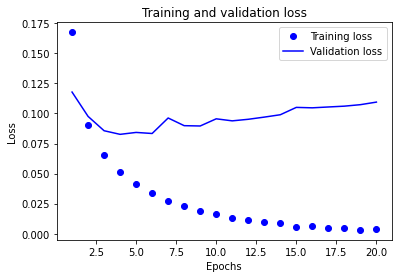

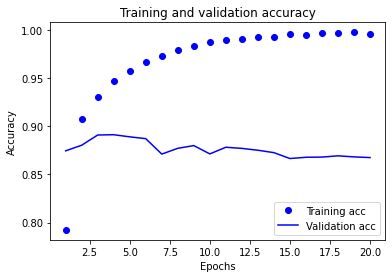

782/782 [==============================] - 1s 904us/step - loss: 0.1227 - accuracy: 0.8505


In [28]:
# 使用mse损失函数替代binary_crossentropy
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
print_train_val_loss(history.history)
print_train_val_acc(history.history)
results = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4970 - accuracy: 0.7937 - val_loss: 0.3639 - val_accuracy: 0.8748
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2817 - accuracy: 0.9063 - val_loss: 0.2875 - val_accuracy: 0.8891
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1975 - accuracy: 0.9320 - val_loss: 0.2714 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1500 - accuracy: 0.9490 - val_loss: 0.2766 - val_accuracy: 0.8900
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1152 - accuracy: 0.9613 - val_loss: 0.2991 - val_accuracy: 0.8843
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0885 - accuracy: 0.9715 - val_loss: 0.3545 - val_accuracy: 0.8805
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0687 - accuracy: 0.9784 - val_loss: 0.4053 - val_accuracy: 0.8695
Epoch 8/20
30

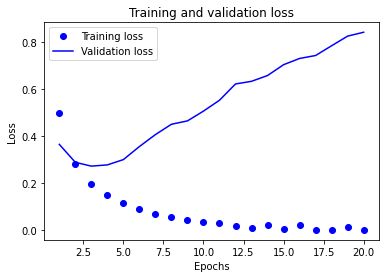

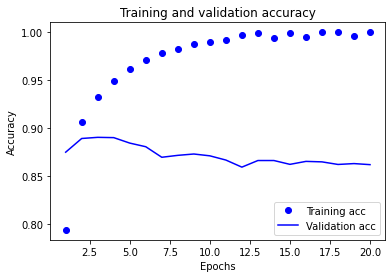

782/782 [==============================] - 1s 852us/step - loss: 0.9411 - accuracy: 0.8459


In [29]:
# 使用tanh替代relu
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
print_train_val_loss(history.history)
print_train_val_acc(history.history)
results = model.evaluate(x_test, y_test)